<a href="https://colab.research.google.com/github/nikhil697/Multi-Threading/blob/main/Assignment7_Multi_Threading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7** - Multi Threading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import threading
import time
import psutil

In [2]:
def multiply_matrices(matrix1, matrix2):
    return np.matmul(matrix1, matrix2)

In [3]:
constant_matrix = np.random.rand(1000, 1000)

random_matrices = [np.random.rand(1000, 1000) for _ in range(100)]

In [4]:
def worker(thread_id, matrices, results):
    for matrix in matrices:
        result = multiply_matrices(matrix, constant_matrix)
        results.append(result)
    print(f"Thread {thread_id} finished")

def run_multithreaded(num_threads):
    threads = []
    results = []
    chunk_size = len(random_matrices) // num_threads
    for i in range(num_threads):
        start = i * chunk_size
        end = (i + 1) * chunk_size if i != num_threads - 1 else len(random_matrices)
        t = threading.Thread(target=worker, args=(i + 1, random_matrices[start:end], results))
        threads.append(t)
        t.start()
    for t in threads:
        t.join()
    return results, threads

In [5]:
execution_times = []
thread_names = []
for num_threads in range(1, 9):
    start_time = time.time()
    results, threads = run_multithreaded(num_threads)
    end_time = time.time()
    execution_times.append(end_time - start_time)
    thread_names.extend([f"Thread {t.name}" for t in threads])

print("\nThread Name\tTime Taken (seconds)")
for thread_name, time_taken in zip(thread_names, execution_times):
    print(f"{thread_name}\t\t{time_taken:.2f}")

Thread 1 finished
Thread 1 finished
Thread 2 finished
Thread 2 finished
Thread 1 finished
Thread 3 finished
Thread 1 finished
Thread 2 finished
Thread 4 finished
Thread 3 finished
Thread 1 finished
Thread 2 finished
Thread 3 finished
Thread 4 finished
Thread 5 finished
Thread 2 finished
Thread 4 finished
Thread 5 finished
Thread 1 finished
Thread 3 finished
Thread 6 finished
Thread 1 finished
Thread 2 finished
Thread 3 finished
Thread 4 finished
Thread 5 finished
Thread 6 finished
Thread 7 finished
Thread 1 finished
Thread 2 finished
Thread 6 finished
Thread 7 finished
Thread 5 finished
Thread 3 finished
Thread 4 finished
Thread 8 finished

Thread Name	Time Taken (seconds)
Thread Thread-10 (worker)		9.49
Thread Thread-11 (worker)		14.32
Thread Thread-12 (worker)		6.96
Thread Thread-13 (worker)		7.22
Thread Thread-14 (worker)		6.14
Thread Thread-15 (worker)		6.83
Thread Thread-16 (worker)		6.17
Thread Thread-17 (worker)		6.85


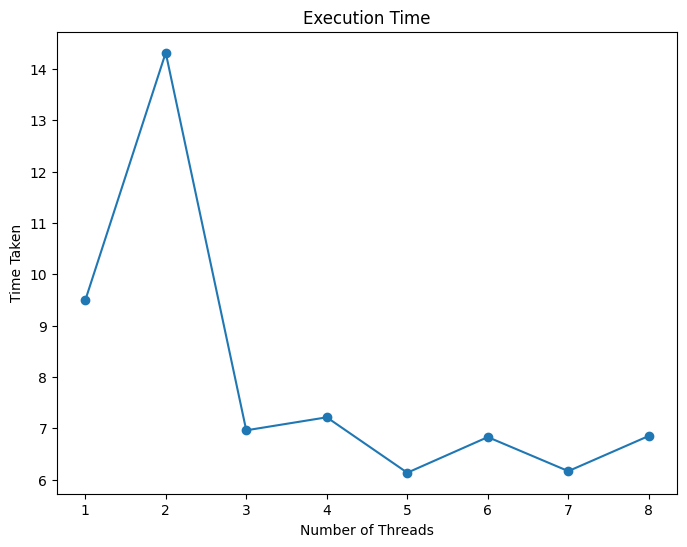

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), execution_times, marker='o')
plt.xlabel("Number of Threads")
plt.ylabel("Time Taken")
plt.title("Execution Time")
plt.show()

CPU Usage (%) for different threads:
Threads: 1, CPU Usage: [3.0, 2.0]
Threads: 2, CPU Usage: [3.0, 3.0]
Threads: 3, CPU Usage: [3.0, 4.0, 0]
Threads: 4, CPU Usage: [3.0, 2.0, 0, 0]
Threads: 5, CPU Usage: [3.0, 3.0, 0, 0, 0]
Threads: 6, CPU Usage: [49.5, 61.0, 0, 0, 0, 0]
Threads: 7, CPU Usage: [32.3, 26.3, 0, 0, 0, 0, 0]
Threads: 8, CPU Usage: [2.0, 3.0, 0, 0, 0, 0, 0, 0]


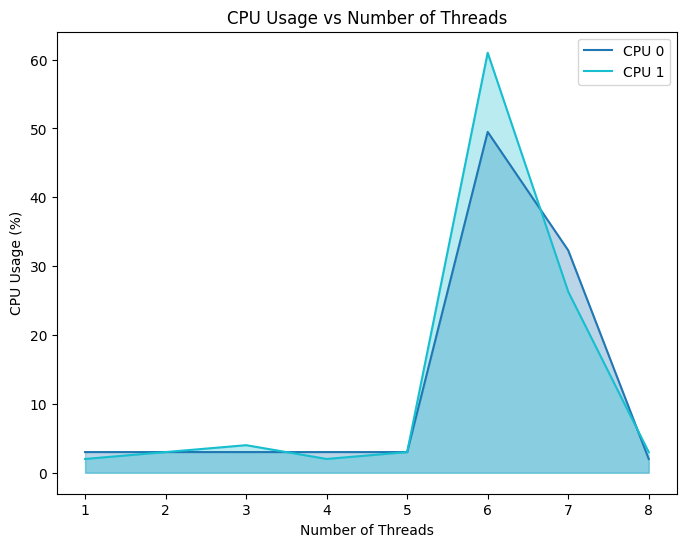

In [7]:
cpu_usages = []
for num_threads in range(1, 9):
    cpu_usage = psutil.cpu_percent(interval=1, percpu=True)
    num_cpus = len(cpu_usage)
    if num_threads > num_cpus:
        cpu_usage = cpu_usage + [0] * (num_threads - num_cpus)
    cpu_usages.append(cpu_usage)

print("CPU Usage (%) for different threads:")
for i, usage in enumerate(cpu_usages):
    print(f"Threads: {i + 1}, CPU Usage: {usage}")

plt.figure(figsize=(8, 6))
thread_counts = range(1, 9)
num_cpus = psutil.cpu_count()
x = np.arange(len(thread_counts))
colors = plt.cm.tab10(np.linspace(0, 1, num_cpus))

for cpu in range(num_cpus):
    cpu_data = [usage[cpu] for usage in cpu_usages]
    plt.plot(x, cpu_data, color=colors[cpu], label=f'CPU {cpu}')
    plt.fill_between(x, cpu_data, alpha=0.3, color=colors[cpu])

plt.xlabel("Number of Threads")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage vs Number of Threads")
plt.xticks(x, thread_counts)
plt.legend()
plt.show()